In [13]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import pandas_datareader as dr

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

Yahoo finance dataset


In [4]:
# Load dataset
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = read_csv('/content/drive/My Drive/SP500Data.csv',index_col=0)

In [7]:
type(dataset)

pandas.core.frame.DataFrame

In [8]:
# Explore data analysis 
dataset.shape


(448, 502)

In [10]:

set_option('display.width', 100)
dataset.head(5)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,VMC,WAB,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,10.98,106.089996,10.88,203.039993,43.985001,67.599998,165.509995,65.559998,75.010002,131.529999,129.929993,124.050003,224.619995,79.910004,170.320007,255.330002,42.110001,101.919998,1073.209961,1065.000000,70.739998,1189.010010,11.8,58.389999,52.990002,72.410004,98.940002,59.500000,141.130005,89.080002,169.910004,94.040001,72.750000,177.000000,...,115.599998,54.860001,70.075333,92.800003,110.980003,59.759998,109.470001,95.830002,53.529999,152.910004,31.190001,114.510002,77.320000,131.869995,82.930000,98.589996,74.949997,111.800003,86.099998,195.690002,65.769997,202.550003,61.090000,64.029999,81.379997,19.080000,64.709999,35.299999,167.990005,31.139999,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,124.059998,50.700001,71.769997
2018-01-03,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,11.55,107.050003,10.87,202.119995,44.115002,69.320000,166.410004,65.940002,74.660004,131.789993,129.320007,124.949997,231.199997,80.250000,170.139999,260.070007,41.740002,101.980003,1091.520020,1082.479980,70.480003,1204.199951,11.8,58.090000,52.340000,71.800003,99.550003,60.160000,141.679993,88.449997,169.070007,94.389999,73.389999,180.339996,...,113.389999,55.259998,69.472694,93.290001,111.309998,60.119999,110.900002,95.550003,52.430000,152.009995,29.950001,115.650002,77.099998,134.289993,82.260002,99.449997,75.510002,112.279999,87.349998,197.770004,65.540001,203.320007,61.560001,64.139999,82.669998,19.070000,65.400002,35.610001,168.839996,32.000000,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,124.919998,50.639999,72.099998
2018-01-04,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,12.12,111.000000,10.83,198.539993,44.570000,68.800003,167.050003,65.599998,73.849998,130.220001,126.739998,122.690002,233.300003,81.370003,171.580002,264.049988,41.250000,100.800003,1095.760010,1086.400024,70.199997,1209.589966,11.8,57.430000,52.669998,70.949997,100.849998,60.400002,139.610001,87.610001,169.690002,94.180000,73.980003,179.580002,...,112.790001,55.750000,71.054611,93.589996,109.860001,58.650002,111.470001,96.029999,52.599998,153.070007,29.559999,116.080002,74.800003,133.380005,83.370003,99.540001,71.599998,112.230003,88.099998,199.660004,65.309998,206.509995,62.330002,62.759998,82.169998,19.450001,67.040001,35.320000,168.820007,32.549999,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,124.739998,50.849998,72.529999
2018-01-05,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,11.88,112.180000,10.87,199.470001,44.865002,69.900002,168.449997,65.830002,73.739998,131.720001,127.000000,122.800003,241.070007,81.570000,172.289993,264.760010,41.080002,101.870003,1110.290039,1102.229980,70.400002,1229.140015,11.8,57.389999,52.650002,70.800003,101.080002,60.650002,140.509995,86.750000,170.270004,95.320000,73.790001,180.649994,...,111.970001,55.990002,71.280602,94.029999,110.870003,58.349998,113.000000,96.879997,52.480000,155.690002,29.100000,118.860001,75.440002,131.899994,81.830002,100.129997,72.919998,111.620003,87.989998,202.229996,64.870003,211.320007,62.750000,62.369999,82.690002,20.600000,67.309998,35.270000,168.479996,32.459999,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,125.980003,50.869999,73.360001
2018-01-08,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,12.28,111.389999,10.87,200.529999,44.980000,70.050003,168.630005,65.879997,72.750000,137.449997,127.279999,119.699997,248.899994,81.239998,170.559998

In [11]:
# describe data
set_option('precision', 3)
dataset.describe()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,VMC,WAB,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
count,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,...,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000,448.000
mean,70.934,88.078,307.304,167.474,59.631,252.271,21.805,147.501,14.535,128.424,47.520,70.185,179.967,74.222,63.243,88.165,132.110,120.351,273.407,89.365,160.509,191.913,44.691,96.219,1138.539,1131.920,55.487,1707.999,10.453,66.377,37.806,77.134,107.205,51.269,169.475,96.737,140.200,85.895,78.543,187.944,...,126.913,37.644,80.077,93.168,121.226,60.137,160.737,123.295,54.420,172.212,29.616,145.899,68.210,121.121,82.934,98.081,64.873,116.942,96.159,207.208,72.731,254.600,51.954,69.828,61.936,19.605,48.126,29.927,139.518,27.008,165.139,139.475,51.671,29.151,90.774,74.549,93.492,120.406,49.230,94.787
std,9.016,13.481,71.990,14.635,13.119,29.001,7.425,21.095,2.266,38.573,3.668,5.111,25.453,7.653,3.606,15.543,10.959,10.029,60.542,9.003,17.205,40.997,4.101,6.058,66.545,66.390,7.180,181.678,0.744,7.774,8.162,9.045,9.749,6.193,30.667,14.533,14.410,6.560,6.516,10.385,...,10.160,7.379,6.615,14.801,9.664,6.929,31.696,18.943,3.931,11.142,2.360,19.242,3.935,14.267,14.152,9.579,9.104,13.305,12.364,17.249,10.273,34.779,5.015,11.481,17.992,1.397,11.830,5.012,17.542,2.333,17.384,29.252,6.651,3.450,21.081,4.927,11.959,9.200,4.820,14.396
min,56.270,62.980,159.310,133.670,40.110,177.700,9.530,103.760,10.060,71.800,41.625,61.130,148.910,57.700,53.600,59.300,110.280,93.940,173.160,74.820,115.730,118.210,37.140,77.270,984.670,976.220,40.120,1189.010,8.750,52.590,24.450,62.930,88.340,36.590,133.000,76.060,97.580,70.760,63.350,166.050,...,110.150,25.060,63.390,68.940,103.970,46.960,105.620,92.280,46.290,145.720,22.180,113.860,58.810,84.200,62.310,82.400,49.290,98.540,79.120,173.540,58.600,188.410,43.380,50.010,35.060,16.550,32.310,21.100,101.720,20.580,134.840,92.010,42.130,18.920,62.820,61.380,76.300,97.230,38.510,71.510
25%,62.620,78.658,260.557,157.280,47.038,235.377,15.147,133.307,12.848,94.060,44.568,66.302,160.687,68.740,60.957,74.370,123.557,114.627,229.370,82.223,148.220,155.230,41.713,93.405,1084.760,1079.300,49.685,1590.305,9.843,58.665,32.090,69.288,99.675,44.810,143.025,85.652,130.427,81.905,73.700,180.233,...,118.697,33.153,74.998,82.377,113.033,54.795,136.365,107.622,51.325,165.485,28.547,131.437,66.027,111.345,71.945,89.630,55.037,107.668,86.212,194.870,64.295,229.807,47.797,60.282,47.728,18.657,37.395,25.657,126.515,25.338,151.705,114.085,45.690,27.140,71.665,70.548,83.508,114.030,45.108,84.557
50%,70.015,88.525,301.940,162.880,55.270,254.685,21.885,154.950,14.830,113.390,46.580,69.495,167.050,73.390,63.115,91.795,127.225,120.410,268.040,87.655,160.830,197.970,43.620,95.960,1139.155,1132.005,55.885,1723.825,10.450,65.855,36.055,74.445,105.750,53.310,159.060,90.440,142.050,85.845,76.835,188.215,...,125.265,36.325,80.465,88.285,119.235,59.530,157.135,118.825,55.080,174.105,29.690,140.795,67.735,121.095,79.835,97.455,65.815,112.495,91.190,204.215,69.600,259.820,51.510,69.390,56.555,19.400,44.030,27.400,139.250,27.160,158.810,132.975,49.370,29.075,85.195,75.165,89.930,120.645,49.185,90.090
75%,78.620,96.667,368.095,178.338,71.565,272.990,28.438,163.615,16.355,158.855,49.

In [ ]:
# visualize clustering


In [12]:
# Data preprocessing
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [14]:
# get rid of columns with > 30% missing values 
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(448, 498)

In [15]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,VMC,WAB,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,58.79,98.41,192.49,153.84,64.31,177.70,10.98,106.09,10.88,203.04,43.985,67.60,165.51,65.56,75.01,131.53,129.93,124.05,224.62,79.91,170.32,255.33,42.11,101.92,1073.21,1065.00,70.74,1189.01,11.8,58.39,52.99,72.41,98.94,59.50,141.13,89.08,169.91,94.04,72.75,177.00,...,115.60,54.86,70.075,92.80,110.98,59.76,109.47,95.83,53.53,152.91,31.19,114.51,77.32,131.87,82.93,98.59,74.95,111.80,86.10,195.69,65.77,202.55,61.09,64.03,81.38,19.08,64.71,35.30,167.99,31.14,146.99,164.30,47.81,29.37,67.88,68.07,81.60,124.06,50.70,71.77
2018-01-03,58.92,99.95,195.82,154.55,65.31,181.04,11.55,107.05,10.87,202.12,44.115,69.32,166.41,65.94,74.66,131.79,129.32,124.95,231.20,80.25,170.14,260.07,41.74,101.98,1091.52,1082.48,70.48,1204.20,11.8,58.09,52.34,71.80,99.55,60.16,141.68,88.45,169.07,94.39,73.39,180.34,...,113.39,55.26,69.473,93.29,111.31,60.12,110.90,95.55,52.43,152.01,29.95,115.65,77.10,134.29,82.26,99.45,75.51,112.28,87.35,197.77,65.54,203.32,61.56,64.14,82.67,19.07,65.40,35.61,168.84,32.00,149.74,162.52,47.49,29.33,69.24,68.90,81.53,124.92,50.64,72.10


In [16]:
# Data transformation
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns
#format the data as a numpy array to feed into the K-Means algorithm
#data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [17]:
returns

,Returns,Volatility
ABT,0.195,0.219
ABBV,-0.109,0.327
ABMD,0.045,0.472
ACN,0.126,0.212
ATVI,-0.018,0.378
...,...,...
XYL,0.104,0.244
YUM,0.206,0.175
ZBH,0.080,0.232
ZION,-0.046,0.257


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(2)
X=rescaledDataset
X.head(2)

,Returns,Volatility
ABT,0.794,-0.703
ABBV,-0.928,0.795


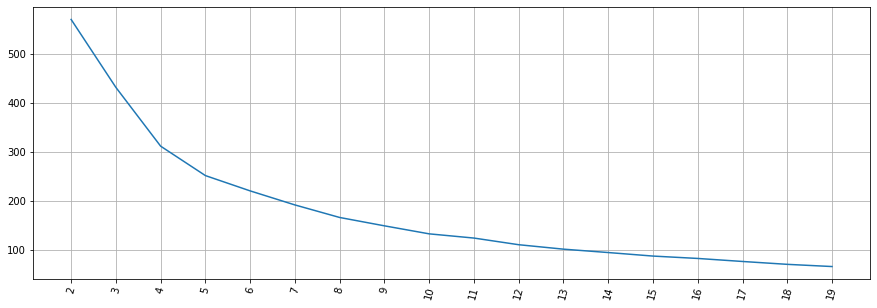

In [19]:
# K Mean cluster
distorsions = []
max_loop=20
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

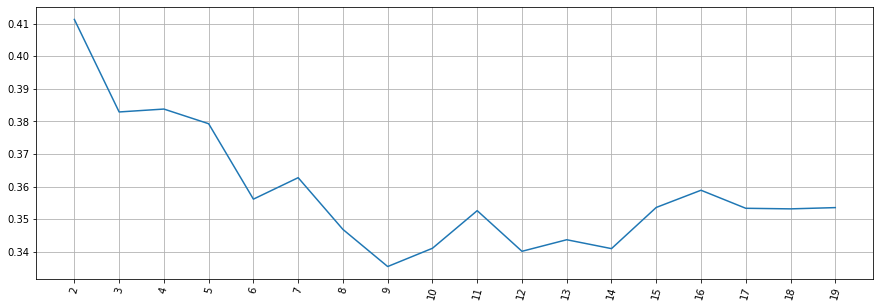

In [20]:
# Silhouette score 
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

In [ ]:
# K means with 6 clusters

In [22]:
#Fit with k-means
nclust=6
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
#Extracting labels 
target_labels = k_means.predict(X)

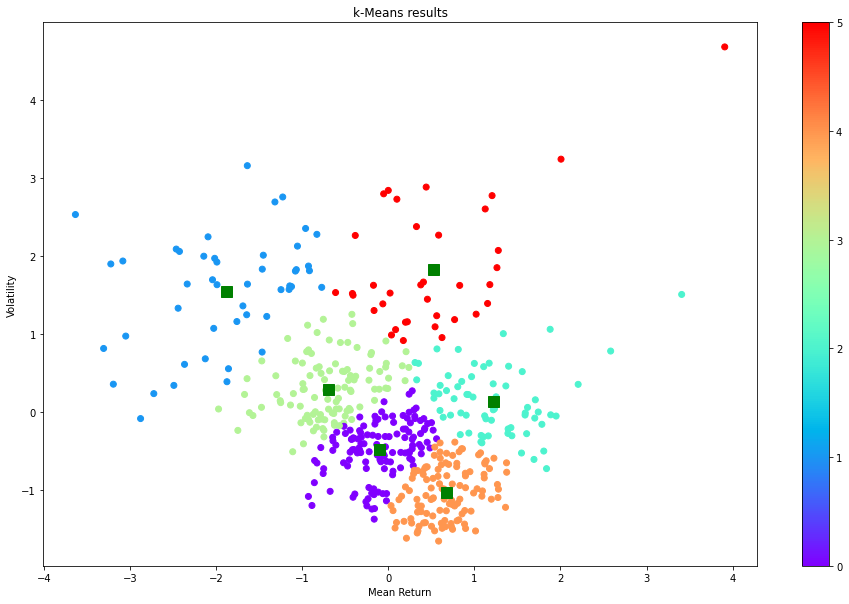

In [24]:
centroids = k_means.cluster_centers_
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c = k_means.labels_, cmap ="rainbow", label = X.index)
ax.set_title('k-Means results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)

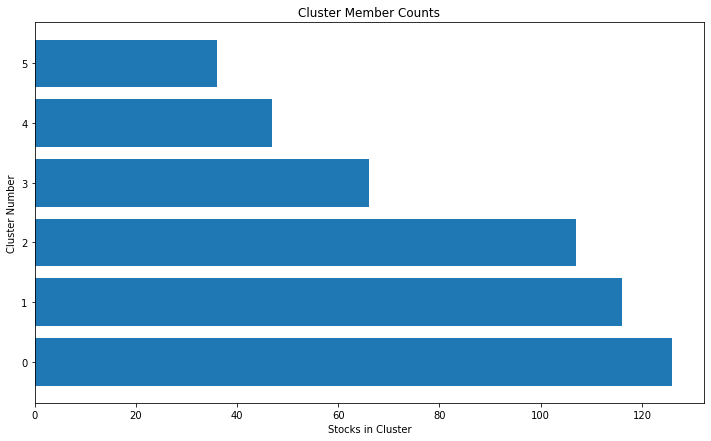

In [25]:
# show number of stocks in each cluster
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series.value_counts())), # cluster labels, y axis
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [ ]:
# Hierarchical clustering - Agglomerative clustering 


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

#Calulate linkage
Z= linkage(X, method='ward')
Z[0]

array([3.30000000e+01, 3.14000000e+02, 3.62580431e-03, 2.00000000e+00])

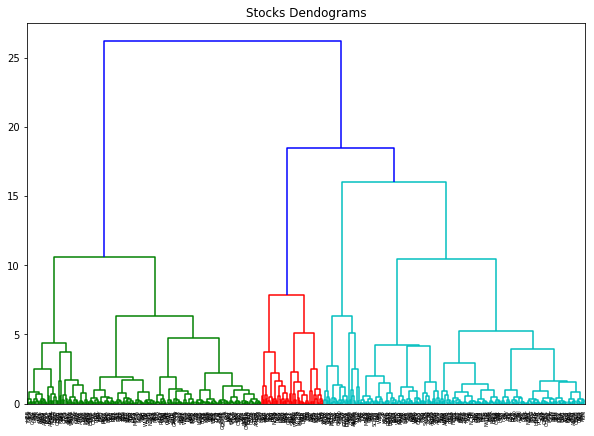

In [27]:
#Plot Dendogram
plt.figure(figsize=(10, 7))
plt.title("Stocks Dendograms")
dendrogram(Z,labels = X.index)
plt.show()

In [28]:
distance_threshold = 13
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters['cluster'].unique()

array([1, 4, 3, 2], dtype=int32)

In [29]:
nclust = 4
hc = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = hc.fit_predict(X)

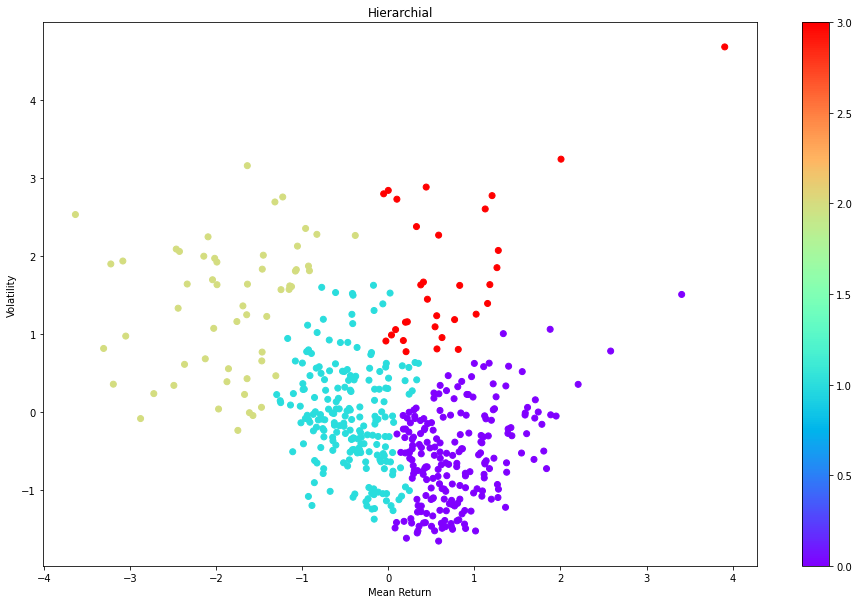

In [30]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels1, cmap ="rainbow")
ax.set_title('Hierarchial')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

In [31]:
# Affinity Propagation
ap = AffinityPropagation()
ap.fit(X)
clust_labels2 = ap.predict(X)

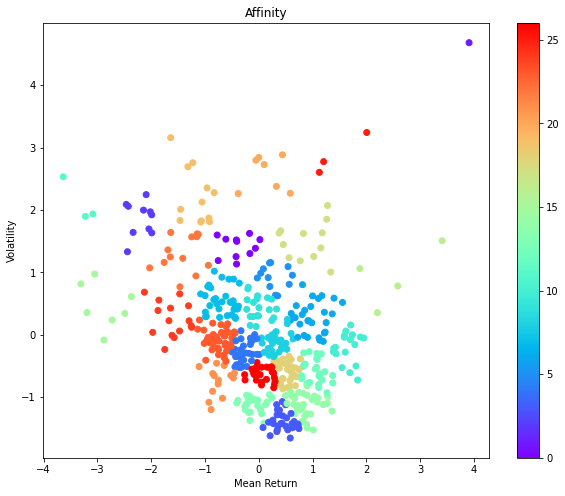

In [32]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c =clust_labels2, cmap ="rainbow")
ax.set_title('Affinity')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)

In [33]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 27


<Figure size 432x288 with 0 Axes>

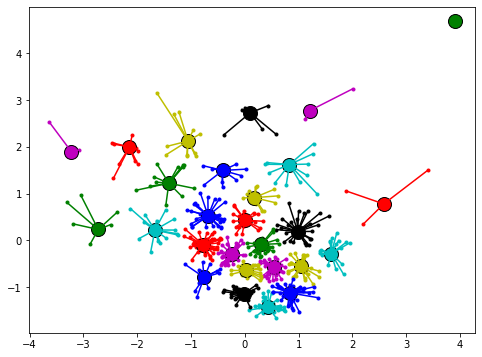

In [34]:
no_clusters = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

X_temp=np.asarray(X)
plt.close('all')
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(8,6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

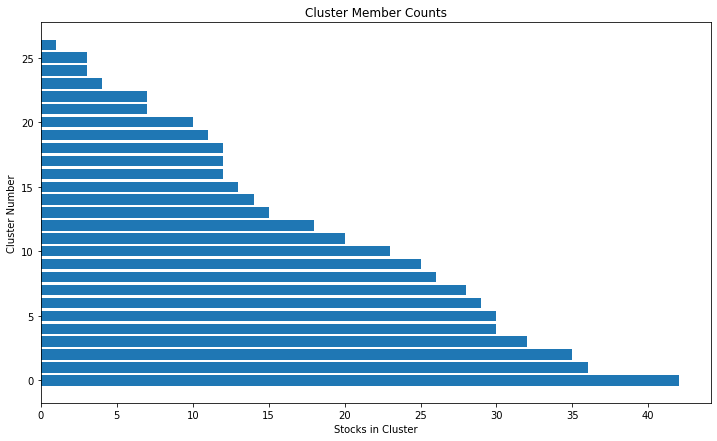

In [35]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

plt.figure(figsize=(12,7))
plt.barh(
    range(len(clustered_series_ap.value_counts())), # cluster labels, y axis
    clustered_series_ap.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')
plt.show()

In [ ]:
# Performance and evaluation 

In [36]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.33565079793075325
hc 0.3432149515640865
ap 0.3450647315156527


In [37]:
# all stock with its cluster label (including -1)
clustered_series = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=ap.fit_predict(X).flatten())
clustered_series = clustered_series[clustered_series != -1]

In [38]:
# get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<25) & (counts>1)].index)[::-1]
cluster_vis_list

[11, 25, 16, 20, 15, 2, 0, 5, 19, 17, 22, 21, 24, 10, 9, 13]

In [39]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 26
Pairs to evaluate: 12166


In [40]:
# plot a handful of the smallest clusters
plt.figure(figsize=(12,7))
cluster_vis_list[0:min(len(cluster_vis_list), 4)]

[11, 25, 16, 20]

<Figure size 864x504 with 0 Axes>

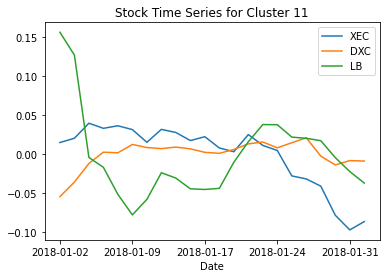

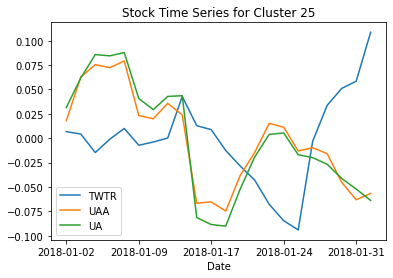

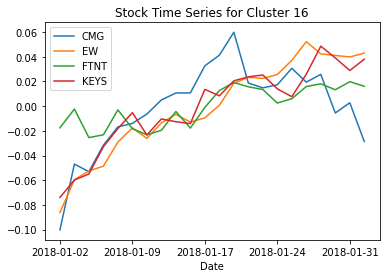

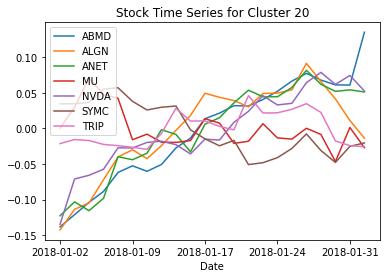

In [41]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(dataset.loc[:"2018-02-01", tickers].mean())
    data = np.log(dataset.loc[:"2018-02-01", tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)
plt.show()

In [42]:
# Pairs Selection
# Cointegration and Pair Selection Function
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [43]:
from statsmodels.tsa.stattools import coint
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index   
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        dataset[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [44]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [45]:
print ("Number of pairs found : %d" % len(pairs))
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)))

Number of pairs found : 32
In those pairs, there are 47 unique tickers.


In [46]:
pairs

[('AOS', 'FITB'),
 ('AOS', 'ZION'),
 ('AIG', 'TEL'),
 ('ABBV', 'BWA'),
 ('AFL', 'ARE'),
 ('AFL', 'ED'),
 ('AFL', 'MMC'),
 ('AFL', 'WM'),
 ('ACN', 'EQIX'),
 ('A', 'WAT'),
 ('ADBE', 'ADI'),
 ('ADBE', 'CDNS'),
 ('ADBE', 'VFC'),
 ('ABT', 'AZO'),
 ('ABT', 'CHD'),
 ('ABT', 'IQV'),
 ('ABT', 'WELL'),
 ('ALL', 'GL'),
 ('MO', 'CCL'),
 ('ALB', 'CTL'),
 ('ALB', 'FANG'),
 ('ALB', 'EOG'),
 ('ALB', 'HP'),
 ('ALB', 'NOV'),
 ('ALB', 'PVH'),
 ('ALB', 'TPR'),
 ('ADSK', 'ULTA'),
 ('ADSK', 'XLNX'),
 ('AAL', 'FCX'),
 ('CMG', 'EW'),
 ('CMG', 'KEYS'),
 ('XEC', 'DXC')]

In [47]:
# Pair Visualization
from sklearn.manifold import TSNE
import matplotlib.cm as cm
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=X.index, data=X).T

In [48]:
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.T.loc[stocks]

In [49]:
X_tsne = TSNE(learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

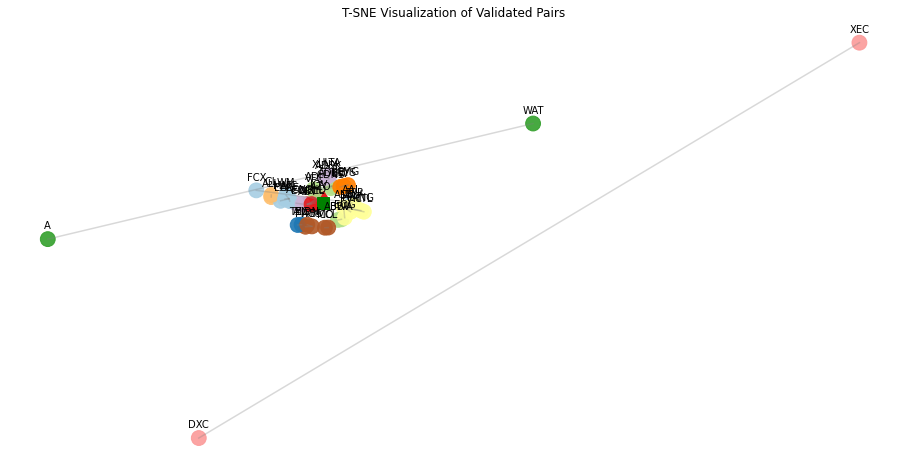

In [50]:
plt.figure(1, facecolor='white',figsize=(16,8))
plt.clf()
plt.axis('off')
for pair in pairs:
    #print(pair[0])
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    #print(ticker1, loc1)

    ticker2 = pair[0]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
      
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, c='gray');
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=220, alpha=0.9, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('T-SNE Visualization of Validated Pairs'); 

# zip joins x and y coordinates in pairs
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)